# Sigmoid, Softmax

sigmoid, softmax 함수는 classification에 자주 사용된다.

## odds

$odds = {p \over 1-p}$

odds는 1보다 크면 p로 정의된 사건이 나올 확률이 높음을 의미한다.

odds는 비대칭적인 그래프 개형으로 p가 1에 가까울수록 발산한다.

Text(0.5, 0, 'Probability')

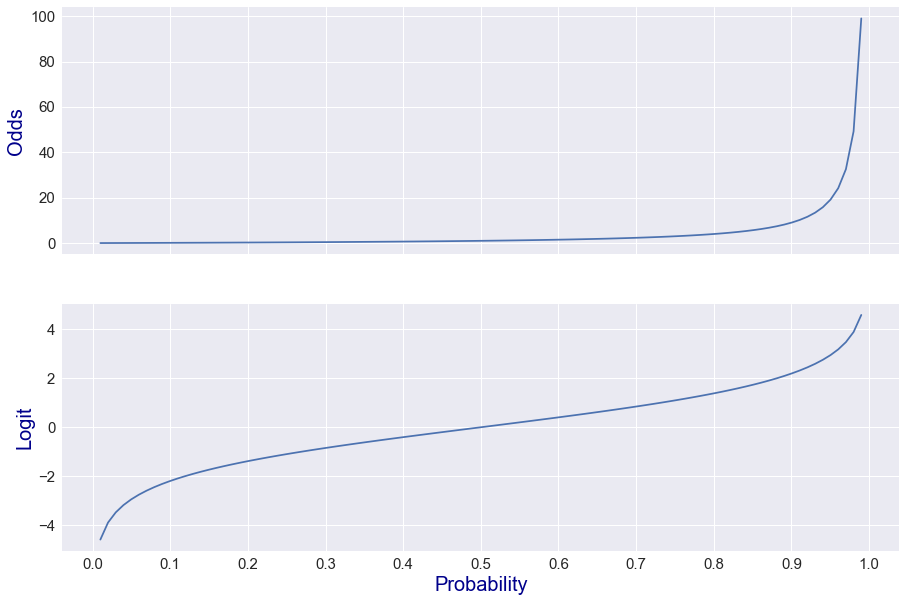

In [17]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

p = np.linspace(0.01, 0.99, 100)

odds = p/(1-p)

logit = np.log(odds)

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex = True)

axes[0].plot(p, odds)
axes[1].plot(p, logit)

xticks = np.arange(0, 1.1, 0.1)

axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit',fontsize=20, color = 'darkblue')
axes[1].set_xlabel('Probability',fontsize=20, color= 'darkblue')

## logit

logit은 log(odds)로, p = 0.5에서 0을 기준으로 대칭이다.

## Sigmoid

Sigmoid 함수는 Logit함수의 역함수를 구하면 얻을 수 있다.

즉, Sigmoid 함수는 Logit($-\infty \sim \infty$)을 확률($0 \sim 1$)로 바꾸는 역할을 한다.

Z(affine transform 이후의 값, $-\infty \sim \infty$)을 Logit으로 본다면 network 말단에서의 Sigmoid 함수는 binary classification에서 분류 확률을 생성한다고 볼 수 있다.

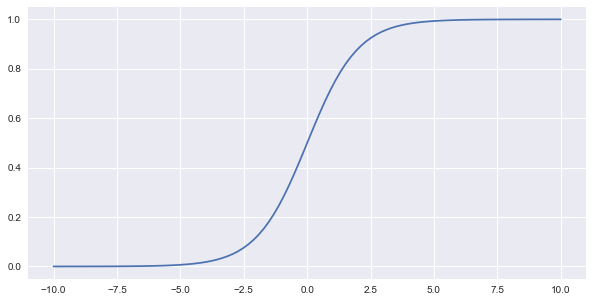

In [22]:
import torch

X = np.linspace(-10, 10, 100)
sigmoid = torch.nn.Sigmoid()

fig,ax = plt.subplots(figsize =(10,5))
ax.plot(X,sigmoid(torch.tensor(X)).detach().numpy())

## Softmax

Softmax 함수를사용하는 경우, 마지막 레이어에서 뉴런의 개수는 분류하고자 하는 클래스의 개수(K)와 같아야 한다.

Softmax함수 역시, Affine transform으로 계산된 Logit vector 값, Z값들을 각 클래스에 해당하는 확률로 변환하는 역할을 수행한다.

## Binary Clasification

- network의 마지막 단에 뉴런 1개를 달고, activation 함수로는 sigmoid를 사용
- network의 마지막 단에 뉴런 2개(binary이므로)를 달고, activation 함수로는 softmax를 사용

## 실습

### Single-variate logistric regression models

torch.Size([100, 1])


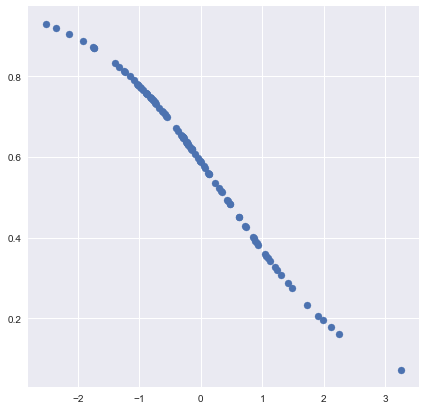

In [33]:
import torch
import matplotlib.pyplot as plt
plt.style.use('seaborn')

X = torch.randn(100, 1)
dense = torch.nn.Linear(1, 1)
sigmoid = torch.nn.Sigmoid()

Z = dense(X)
Y = sigmoid(Z)

print(Y.shape)

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X.detach().numpy().flatten(), Y.detach().numpy().flatten())

### Multivariate Logistic Regression Models

In [46]:
import torch
import matplotlib.pyplot as plt
plt.style.use('seaborn')

X = torch.randn(100, 5)
dense = torch.nn.Linear(5, 5)
softmax = torch.nn.Softmax(dim = 1)

Z = dense(X)
Y = softmax(Z)

print(Y.shape)

torch.Size([100, 5])


### Binary classifier with dense layers

In [51]:
import torch

model = torch.nn.Sequential(
    torch.nn.Linear(5, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 1),
    torch.nn.Sigmoid()
            )

### IO of Softmax

In [57]:
import torch

logit = torch.rand(8, 5) * 10

softmax = torch.nn.Softmax(dim = 1)
softmax_value = softmax(logit)
softmax_sum = softmax_value.sum(axis = 1)

print("Logits: \n", logit.detach().numpy())
print("Probabilities: \n", softmax_value.detach().numpy())
print("Sum of softmax values: \n", softmax_sum)

Logits: 
 [[0.9189397  3.63728    8.255688   8.940283   2.328765  ]
 [0.9887028  3.9113374  7.6701403  5.8474293  5.1217346 ]
 [4.1590185  3.0982966  5.2532916  7.4958887  5.257134  ]
 [7.7868795  6.981852   9.199132   5.9687586  6.547426  ]
 [6.5555744  7.777452   3.9339967  4.936566   7.4234653 ]
 [1.018464   9.554392   2.350555   3.4237218  9.96859   ]
 [6.6772404  5.9236145  7.8187995  1.5115029  2.0173442 ]
 [0.35012186 2.437297   0.02405405 3.7887216  8.996548  ]]
Probabilities: 
 [[2.1733339e-04 3.2937203e-03 3.3376110e-01 6.6183782e-01 8.9003239e-04]
 [9.9178636e-04 1.8437508e-02 7.9091460e-01 1.2780158e-01 6.1854471e-02]
 [2.8198667e-02 9.7625423e-03 8.4229723e-02 7.9325515e-01 8.4553987e-02]
 [1.6655175e-01 7.4461229e-02 6.8372685e-01 2.7036427e-02 4.8223805e-02]
 [1.4192009e-01 4.8161343e-01 1.0315901e-02 2.8113661e-02 3.3803689e-01]
 [7.8007455e-05 3.9741334e-01 2.9556692e-04 8.6442294e-04 6.0134864e-01]
 [2.1656834e-01 1.0192939e-01 6.7821562e-01 1.2363562e-03 2.0503486e-0

### Softmax in Dense Layers

In [59]:
import torch

logit = torch.rand(8, 5) * 10
dense = torch.nn.Linear(5, 8)
softmax = torch.nn.Softmax(dim = 1)

Z = dense(logit)
Y = softmax(Z)
print(Y.sum(axis = 1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       grad_fn=<SumBackward1>)


### Multi class classifiers

In [68]:
import torch

class TestModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        self.dense1 = torch.nn.Linear(5, 8)
        self.dense2 = torch.nn.Linear(8, 5)
        self.dense3 = torch.nn.Linear(5, 3)
        
        self.relu = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax(dim = 1)
        
    def forward(self, x):
        print("X: {}\n{}\n".format(x.detach().numpy().shape, x.detach().numpy()))
    
        x = self.dense1(x)
        x = self.relu(x)
        print("A1: {}\n{}\n".format(x.detach().numpy().shape, x.detach().numpy()))

        x = self.dense2(x)
        x = self.relu(x)
        print("A2: {}\n{}\n".format(x.detach().numpy().shape, x.detach().numpy()))

        x = self.dense3(x)
        x = self.softmax(x)
        print("Y: {}\n{}\n".format(x.detach().numpy().shape, x.detach().numpy()))
        print("Sum of vectors: {}\n".format(x.sum(axis = 1)))
        return x
    
model = TestModel()

X = torch.rand(8, 5) * 10
Y = model(X)

X: (8, 5)
[[4.4334483  6.120454   7.8398747  2.0000982  7.503178  ]
 [6.3106966  4.6656313  7.3524137  7.887173   9.927968  ]
 [5.061039   0.3126204  6.5848455  5.3523307  8.021621  ]
 [0.29343188 0.59397995 2.6777399  4.4499855  9.979138  ]
 [9.328943   6.860013   6.881484   5.011779   2.6328201 ]
 [4.2408586  1.7783427  3.777153   7.3096294  3.933918  ]
 [9.419945   7.6750565  6.4406185  9.136255   5.5726295 ]
 [3.7769592  3.6504412  8.3000555  5.865417   2.8946514 ]]

A1: (8, 8)
[[0.         0.         0.8816985  0.         0.         0.
  0.         0.        ]
 [0.55163115 0.         3.2789507  0.         0.         0.
  0.         0.        ]
 [0.10978973 0.         2.3316934  0.         0.         0.
  0.         0.        ]
 [3.5445273  0.         1.4281071  0.         0.         0.
  0.         0.        ]
 [0.         0.         2.8783548  1.9685457  0.         1.1410106
  0.         1.5175722 ]
 [0.         0.         2.868429   0.         0.         0.
  0.         0.454501